### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

#### You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

In [1]:
# The company wants to know:
# Which variables are significant in predicting the price of a house, and
# How well those variables describe the price of a house
# Determine the optimal value of lambda for ridge and lasso regression.

In [2]:
# Importing libraries
from scipy.stats import skew
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading the dataset
House_df = pd.read_csv('train.csv')

In [4]:
House_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Exploration


In [5]:
#dimension of the data frame\
House_df.shape

(1460, 81)

In [6]:
#Summary of the House data info
print(House_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
House_df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [8]:
print(House_df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

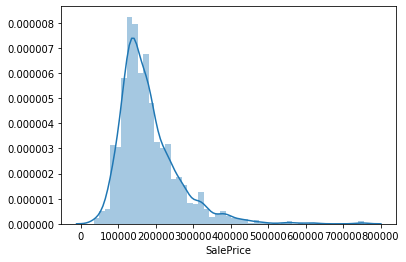

In [9]:
#For anaysis about house price
sns.distplot(House_df['SalePrice'])

In [10]:
print("Skewness: %f" % House_df['SalePrice'].skew())
print("Kurtosis: %f" % House_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


##### it can be found that it is right skewed to follow the linear regression assumption it must be normally distributed

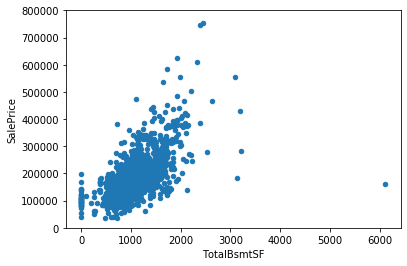

In [11]:
temp = 'TotalBsmtSF'
data = pd.concat([House_df['SalePrice'], House_df[temp]], axis=1)
data.plot.scatter(x=temp, y='SalePrice', ylim=(0,800000));

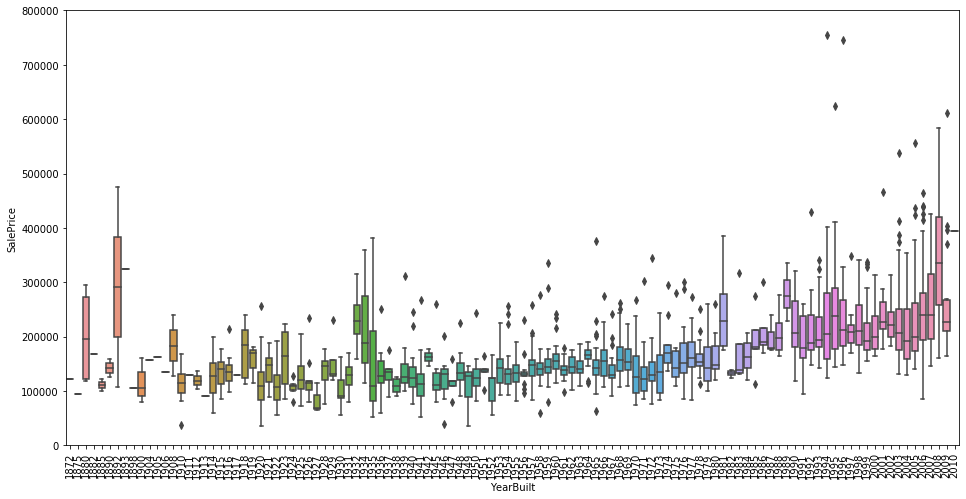

In [12]:
temp = 'YearBuilt'
data = pd.concat([House_df['SalePrice'], House_df[temp]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=temp, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

#### Treatment of year column for data preprocessing

In [13]:
House_df['YearBuilt_Age'] = House_df.YearBuilt.max()-House_df.YearBuilt
House_df['YearRemodAdd_Age'] = House_df.YearRemodAdd.max()-House_df.YearRemodAdd
House_df['GarageYrBlt_Age'] = House_df.GarageYrBlt.max()-House_df.GarageYrBlt
House_df['YrSold_Age'] = House_df.YrSold.max()-House_df.YrSold
House_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500,7,7,7.0,2
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500,34,34,34.0,3
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500,9,8,9.0,2
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000,95,40,12.0,4
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000,10,10,10.0,2


In [14]:
House_df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Age','YearRemodAdd_Age',
             'GarageYrBlt_Age','YrSold_Age']].head(20)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
0,2003,2003,2003.0,2008,7,7,7.0,2
1,1976,1976,1976.0,2007,34,34,34.0,3
2,2001,2002,2001.0,2008,9,8,9.0,2
3,1915,1970,1998.0,2006,95,40,12.0,4
4,2000,2000,2000.0,2008,10,10,10.0,2
5,1993,1995,1993.0,2009,17,15,17.0,1
6,2004,2005,2004.0,2007,6,5,6.0,3
7,1973,1973,1973.0,2009,37,37,37.0,1
8,1931,1950,1931.0,2008,79,60,79.0,2
9,1939,1950,1939.0,2008,71,60,71.0,2


In [15]:
House_df = House_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [16]:
House_df = House_df.drop('Id',axis='columns')
House_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,2,WD,Normal,208500,7,7,7.0,2
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,0,5,WD,Normal,181500,34,34,34.0,3
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,0,9,WD,Normal,223500,9,8,9.0,2
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,0,2,WD,Abnorml,140000,95,40,12.0,4
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,0,12,WD,Normal,250000,10,10,10.0,2


## Data Cleaning and preprocessing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222C9C42C88>,
      dtype=object)

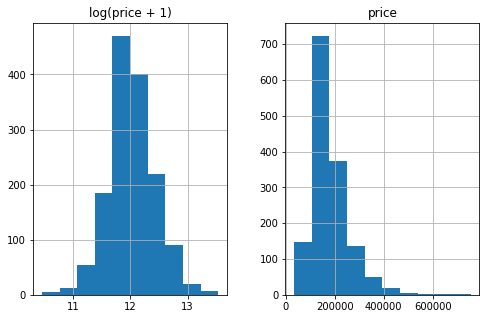

In [17]:
# for comparision between price and transformed log price
price_df = {"price":House_df["SalePrice"], "log(price + 1)":np.log1p(House_df["SalePrice"])}
prices_df = pd.DataFrame(price_df)
plt.rcParams['figure.figsize'] = (8.0, 5.0)
prices_df.hist()

#### It can be found that log price is normally distributed

### log transformation of target variable skewness analysis of skewed variable

In [18]:
House_df["SalePrice"] = np.log1p(House_df["SalePrice"])
numeric_feats = House_df.dtypes[House_df.dtypes != "object"].index
skewed_feats_cols = House_df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats_cols = skewed_feats_cols[skewed_feats_cols > 0.75]
skewed_feats = skewed_feats_cols.index
skewed_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [19]:
House_df[numeric_feats].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
MSSubClass          1460 non-null int64
LotFrontage         1201 non-null float64
LotArea             1460 non-null int64
OverallQual         1460 non-null int64
OverallCond         1460 non-null int64
MasVnrArea          1452 non-null float64
BsmtFinSF1          1460 non-null int64
BsmtFinSF2          1460 non-null int64
BsmtUnfSF           1460 non-null int64
TotalBsmtSF         1460 non-null int64
1stFlrSF            1460 non-null int64
2ndFlrSF            1460 non-null int64
LowQualFinSF        1460 non-null int64
GrLivArea           1460 non-null int64
BsmtFullBath        1460 non-null int64
BsmtHalfBath        1460 non-null int64
FullBath            1460 non-null int64
HalfBath            1460 non-null int64
BedroomAbvGr        1460 non-null int64
KitchenAbvGr        1460 non-null int64
TotRmsAbvGrd        1460 non-null int64
Fireplaces          1460 non-null int64
GarageCar

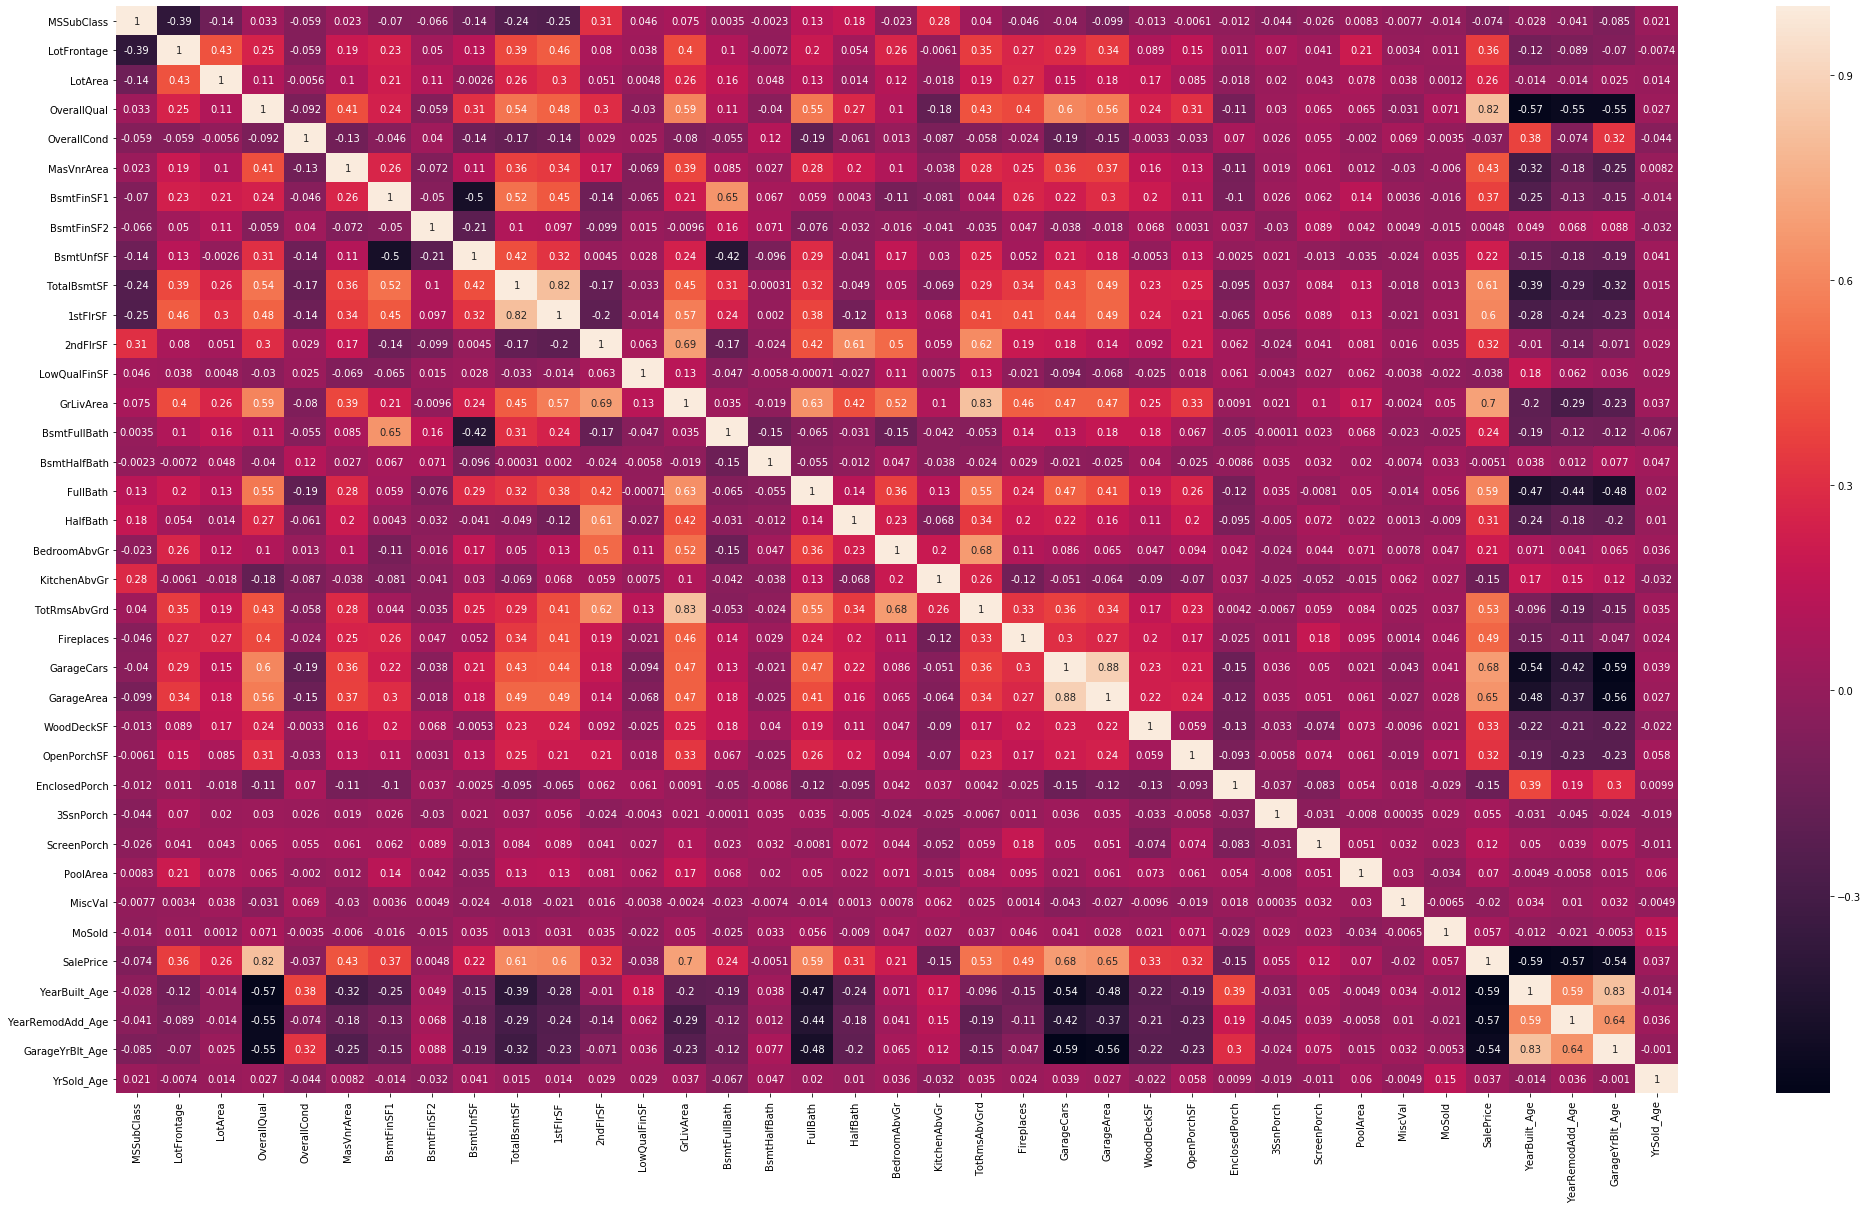

In [20]:
# Finding correlation for heatmap
# figure size for heatmap
cor = House_df[numeric_feats].corr()
plt.figure(figsize=(35,20))
# heatmap
ax = sns.heatmap(cor, annot=True) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

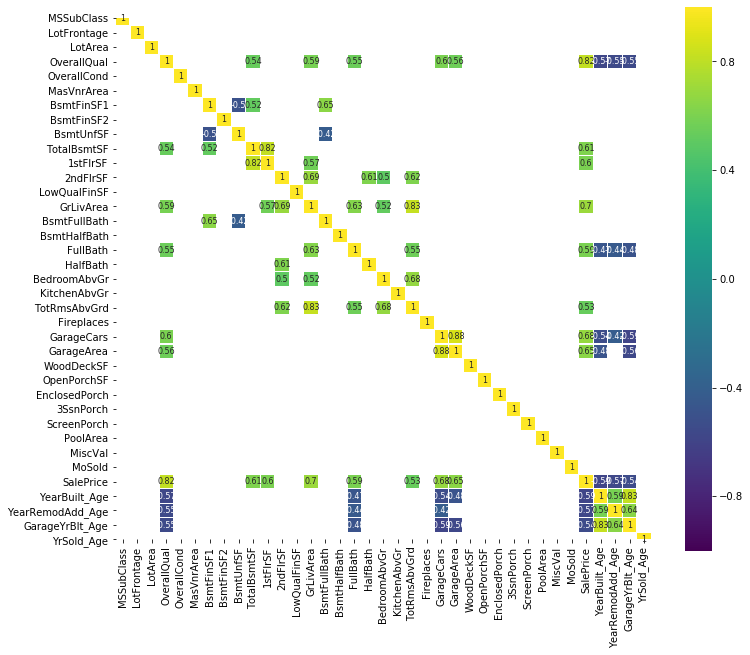

In [21]:
plt.figure(figsize=(12, 10))

sns.heatmap(cor[(cor >= 0.5) | (cor <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [22]:
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.073959,-0.027850,-0.040581,-0.085072,0.021407
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.193458,0.233633,0.049900,0.132644,0.392075,...,0.070029,0.041383,0.206167,0.003368,0.011200,0.355879,-0.123349,-0.088866,-0.070250,-0.007450
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.104160,0.214103,0.111170,-0.002618,0.260833,...,0.020423,0.043160,0.077672,0.038068,0.001205,0.257320,-0.014228,-0.013788,0.024947,0.014261
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.411876,0.239666,-0.059119,0.308159,0.537808,...,0.030371,0.064886,0.065166,-0.031406,0.070815,0.817185,-0.572323,-0.550684,-0.547766,0.027347
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,...,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.036868,0.375983,-0.073741,0.324297,-0.043950
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,1.000000,0.264736,-0.072319,0.114442,0.363936,...,0.018796,0.061466,0.011723,-0.029815,-0.005965,0.430809,-0.315707,-0.179618,-0.252691,0.008201
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.264736,1.000000,-0.050117,-0.495251,0.522396,...,0.026451,0.062021,0.140491,0.003571,-0.015727,0.372023,-0.249503,-0.128451,-0.153484,-0.014359
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.072319,-0.050117,1.000000,-0.209294,0.104810,...,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.004832,0.049107,0.067759,0.088011,-0.031706
BsmtUnfSF,-0.140759,0.132644,-0.002618,0.308159,-0.136841,0.114442,-0.495251,-0.209294,1.000000,0.415360,...,0.020764,-0.012579,-0.035092,-0.023837,0.034888,0.221985,-0.149040,-0.181133,-0.190708,0.041258
TotalBsmtSF,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.363936,0.522396,0.104810,0.415360,1.000000,...,0.037384,0.084489,0.126053,-0.018479,0.013196,0.612134,-0.391452,-0.291066,-0.322445,0.014969


In [23]:
House_df[skewed_feats].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtHalfBath     1460 non-null int64
KitchenAbvGr     1460 non-null int64
WoodDeckSF       1460 non-null int64
OpenPorchSF      1460 non-null int64
EnclosedPorch    1460 non-null int64
3SsnPorch        1460 non-null int64
ScreenPorch      1460 non-null int64
PoolArea         1460 non-null int64
MiscVal          1460 non-null int64
dtypes: float64(2), int64(19)
memory usage: 239.7 KB


### Adding dummy variables for categorical column

In [24]:
House_df[skewed_feats] = np.log1p(House_df[skewed_feats])
House_df = pd.get_dummies(House_df)
House_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,5.283204,6.561031,0.0,5.017280,6.753438,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,0.000000,6.886532,0.0,5.652489,7.141245,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,5.093750,6.188264,0.0,6.075346,6.825460,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,0.000000,5.379897,0.0,6.293419,6.629363,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,5.860786,6.486161,0.0,6.196444,7.044033,...,0,0,0,1,0,0,0,0,1,0


In [25]:
# IMputing null values using mean
House_df = House_df.fillna(House_df.mean())
House_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,5.283204,6.561031,0.0,5.017280,6.753438,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,0.000000,6.886532,0.0,5.652489,7.141245,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,5.093750,6.188264,0.0,6.075346,6.825460,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,0.000000,5.379897,0.0,6.293419,6.629363,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,5.860786,6.486161,0.0,6.196444,7.044033,...,0,0,0,1,0,0,0,0,1,0


In [26]:
# Data splitting in train and test
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(House_df,train_size=0.7,test_size=0.3,random_state=42)

y = X_train.SalePrice
y_train = X_train.pop('SalePrice')
X_train = X_train

y_test = X_test.pop('SalePrice')
X_test = X_test


In [27]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,3.044522,4.394449,9.249657,7,6,5.666427,0.000000,0.000000,7.173958,7.173958,...,0,0,0,1,0,0,0,0,1,0
1452,5.198497,3.583519,8.209580,5,5,4.394449,6.306275,0.000000,0.000000,6.306275,...,0,0,0,1,0,0,0,0,1,0
762,4.110874,4.290459,9.064274,7,5,0.000000,3.218876,0.000000,6.597146,6.629363,...,0,0,0,0,0,0,0,0,1,0
932,3.044522,4.442651,9.364862,9,5,5.713733,0.000000,0.000000,7.552762,7.552762,...,0,0,0,1,0,0,0,0,1,0
435,4.110874,3.784190,9.275004,7,6,0.000000,5.955837,5.843544,4.262680,6.684612,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,3.044522,4.394449,9.169623,8,5,0.000000,7.007601,0.000000,7.259116,7.833996,...,0,0,0,1,0,0,0,0,1,0
1095,3.044522,4.369448,9.139703,6,5,0.000000,3.218876,0.000000,7.163172,7.181592,...,0,0,0,1,0,0,0,0,1,0
1130,3.931826,4.189655,8.962520,4,3,0.000000,6.434547,0.000000,6.216606,7.023759,...,0,0,0,1,0,0,0,0,1,0
1294,3.044522,4.110874,9.008591,5,7,0.000000,5.123964,0.000000,6.548219,6.762730,...,0,0,0,1,0,0,0,0,1,0


## Ridge regression model

In [28]:
### Ridge regression Model
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
cross_val_score(Ridge(), X_train, y, scoring="neg_mean_squared_error", cv = 5)

array([-0.01524858, -0.04105914, -0.01747311, -0.01350708, -0.01807042])

In [29]:
rmse_for_ridge = np.sqrt(-cross_val_score(Ridge(), X_train, y, scoring="neg_mean_squared_error", cv = 5))
rmse_for_ridge

array([0.12348514, 0.20263056, 0.13218589, 0.11621994, 0.13442626])

In [30]:
print(rmse_for_ridge)

[0.12348514 0.20263056 0.13218589 0.11621994 0.13442626]


Text(0, 0.5, 'rmse')

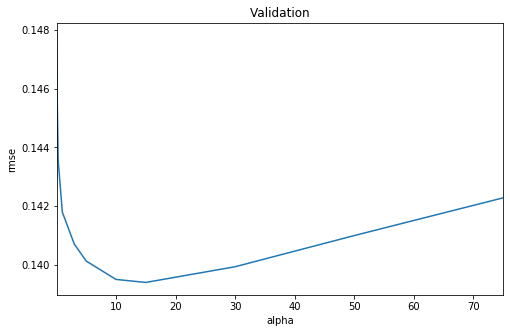

In [31]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [32]:
cv_ridge.min()

0.13939758450539042

## Improving ridge regression model by using gridsearchcv

In [33]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,1.5,2.5, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,30,50,100,150 ,200]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 31 candidates, totalling 310 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:    6.6s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.5,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 30, 50, 100, 150, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [34]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.015512,0.003700,0.001661,0.001524,0.0001,{'alpha': 0.0001},0.847156,0.909288,0.875740,-0.338671,...,0.953274,0.951618,0.956706,0.952126,0.957297,0.957119,0.954166,0.953218,0.954301,0.001942
1,0.012574,0.003141,0.003205,0.003313,0.0010,{'alpha': 0.001},0.847837,0.909367,0.874809,0.856791,...,0.953218,0.951571,0.956624,0.952083,0.957239,0.957060,0.954166,0.953218,0.954257,0.001932
2,0.017663,0.003176,0.002216,0.001569,0.0100,{'alpha': 0.01},0.855483,0.909674,0.879747,0.905401,...,0.953199,0.951549,0.956600,0.952066,0.957214,0.957038,0.954143,0.953195,0.954234,0.001931
3,0.014112,0.001997,0.002399,0.003245,0.0500,{'alpha': 0.05},0.872218,0.909431,0.891427,0.917398,...,0.952998,0.951320,0.956372,0.951938,0.956982,0.956871,0.953842,0.952926,0.954005,0.001933
4,0.014374,0.004619,0.000325,0.000975,0.1000,{'alpha': 0.1},0.881686,0.908489,0.897109,0.921248,...,0.952607,0.950909,0.955922,0.951731,0.956560,0.956600,0.953297,0.952484,0.953602,0.001932


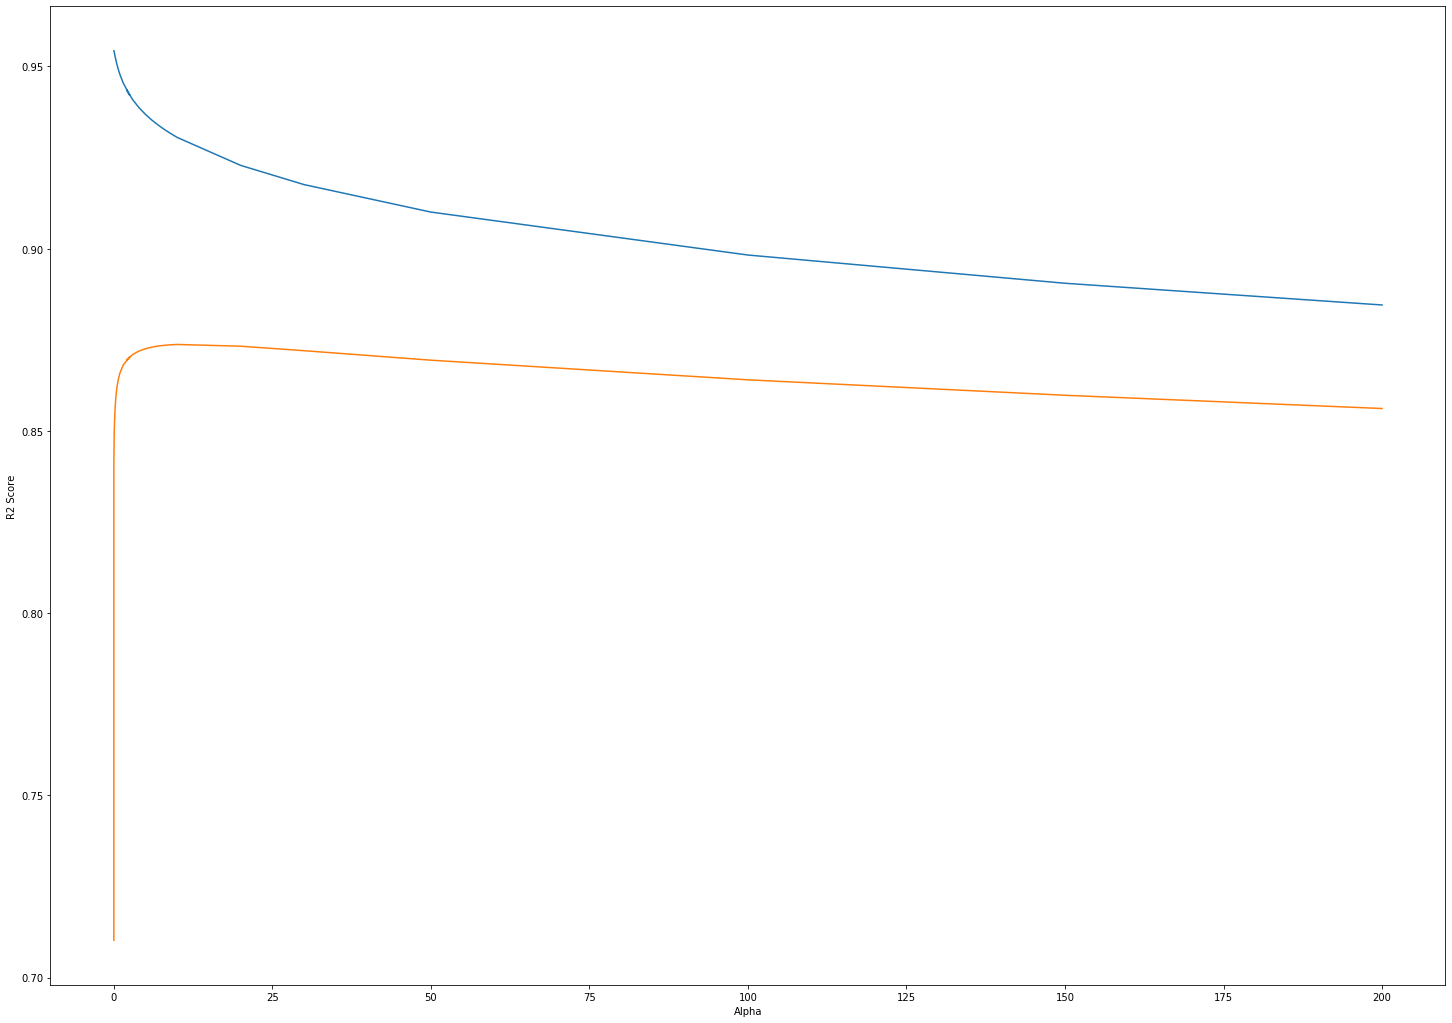

In [35]:
plt.figure(figsize=(25,18))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [36]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 10.0}

In [37]:
ridge = Ridge(alpha = 10)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9292504648912956
0.9049835162192809


In [38]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [39]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)


,Feaure,Coef
0,MSSubClass,8.343147
14,BsmtFullBath,0.169299
11,2ndFlrSF,0.099825
86,Neighborhood_Timber,0.085670
136,Exterior1st_CBlock,0.079066
70,Neighborhood_Edwards,0.077260
3,OverallQual,0.072702
235,FireplaceQu_Ex,0.069968
79,Neighborhood_NridgHt,0.065396
23,GarageArea,0.056804


In [40]:
ridge_coef.sort_values(by='Coef',ascending=False).tail(10)

,Feaure,Coef
48,LotShape_Reg,-0.043008
283,SaleCondition_AdjLand,-0.045226
210,Heating_OthW,-0.049557
230,Functional_Min1,-0.053030
50,LandContour_HLS,-0.055015
265,Fence_GdPrv,-0.059577
37,MSZoning_FV,-0.062533
71,Neighborhood_Gilbert,-0.063148
102,Condition2_RRAe,-0.071378
125,RoofMatl_CompShg,-0.092337


In [41]:
imp_coef_ridge = pd.concat([ridge_coef.sort_values(by='Coef').head(10),
                     ridge_coef.sort_values(by='Coef').tail(10)])
print(imp_coef_ridge)

                    Feaure      Coef
125       RoofMatl_CompShg -0.092337
102        Condition2_RRAe -0.071378
71    Neighborhood_Gilbert -0.063148
37             MSZoning_FV -0.062533
265            Fence_GdPrv -0.059577
50         LandContour_HLS -0.055015
230        Functional_Min1 -0.053030
210           Heating_OthW -0.049557
283  SaleCondition_AdjLand -0.045226
48            LotShape_Reg -0.043008
23              GarageArea  0.056804
79    Neighborhood_NridgHt  0.065396
235         FireplaceQu_Ex  0.069968
3              OverallQual  0.072702
70    Neighborhood_Edwards  0.077260
136     Exterior1st_CBlock  0.079066
86     Neighborhood_Timber  0.085670
11                2ndFlrSF  0.099825
14            BsmtFullBath  0.169299
0               MSSubClass  8.343147


## Laso Model

In [42]:
## Model Lasso Regression
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
rmse_cv(model_lasso).mean()

0.13728927668051064

In [43]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
coef.head()

MSSubClass    -0.019508
LotFrontage   -0.000000
LotArea        0.067892
OverallQual    0.057375
OverallCond    0.039779
dtype: float64

In [44]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 75 variables and eliminated the other 213 variables


## Plotting important coefficient

RoofMatl_ClyTile        -0.293545
SaleCondition_Abnorml   -0.053166
CentralAir_N            -0.042176
Neighborhood_Edwards    -0.037112
LandContour_Bnk         -0.036244
MSZoning_RM             -0.032208
BsmtCond_Fa             -0.022575
MSSubClass              -0.019508
BsmtExposure_No         -0.016751
Fence_GdWo              -0.015343
GarageCars               0.054108
OverallQual              0.057375
Neighborhood_NoRidge     0.062551
BsmtQual_Ex              0.066213
LotArea                  0.067892
Functional_Typ           0.068231
Neighborhood_Crawfor     0.080988
Exterior1st_BrkFace      0.087561
Neighborhood_StoneBr     0.092737
GrLivArea                0.378504
dtype: float64


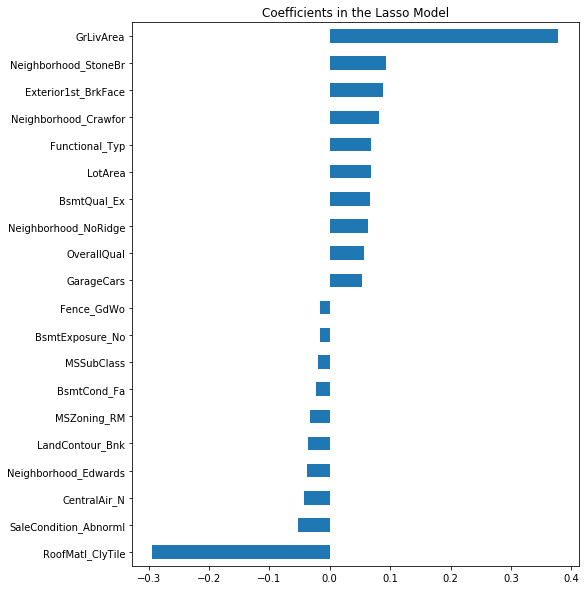

In [45]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
print(imp_coef)

## Improving lasso regression by using Gridsearchcv

In [46]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001,0.001, 0.01]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.2s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [47]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.152680,0.085888,0.002210,0.002566,0.0001,{'alpha': 0.0001},0.912658,0.906286,0.914157,0.932742,...,0.949586,0.947328,0.952574,0.948150,0.953293,0.952781,0.950311,0.948939,0.950276,0.001911
1,0.036020,0.008164,0.002398,0.000790,0.0010,{'alpha': 0.001},0.926679,0.919547,0.910831,0.939874,...,0.919402,0.916596,0.921538,0.925367,0.923288,0.925755,0.914986,0.918798,0.920365,0.003384
2,0.019604,0.002031,0.002194,0.002124,0.0100,{'alpha': 0.01},0.871399,0.880906,0.842729,0.873472,...,0.845301,0.841579,0.847815,0.861288,0.851239,0.854127,0.837698,0.845957,0.846799,0.006778


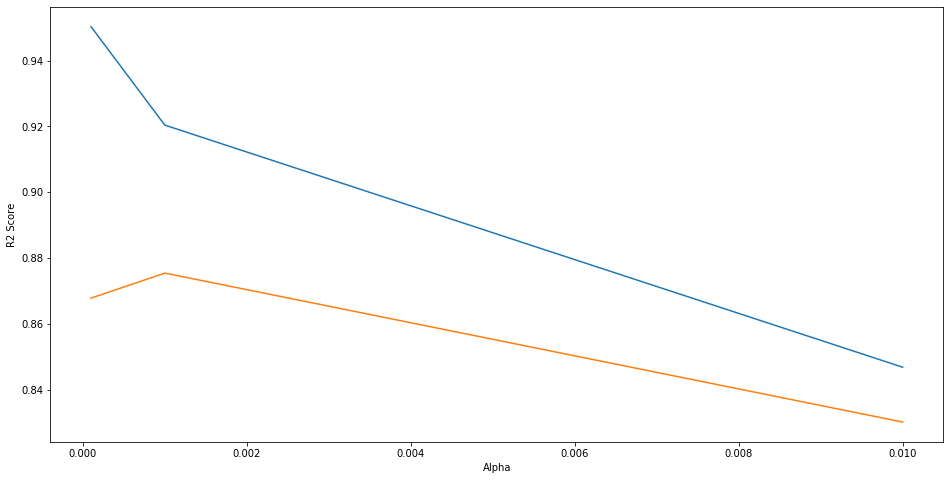

In [48]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [49]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [50]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9172391535152298
0.9081746360565274


## From the above result from Ridge and Lasso regression model it can be found that r2_score for both model are almost same but for feature elimination lasso work better so moving with lasso model is good choice.

In [51]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9172391535152298
0.9081746360565274


In [52]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']



In [53]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,MSSubClass,7.766596
14,BsmtFullBath,0.378504
86,Neighborhood_Timber,0.092737
136,Exterior1st_CBlock,0.087561
70,Neighborhood_Edwards,0.080988
235,FireplaceQu_Ex,0.068231
3,OverallQual,0.067892
183,BsmtQual_Fa,0.066213
79,Neighborhood_NridgHt,0.062551
4,OverallCond,0.057375


In [54]:
lasso_coef.sort_values(by='Coef',ascending=False).tail(10)

,Featuere,Coef
267,Fence_MnPrv,-0.015343
194,BsmtFinType1_ALQ,-0.016751
1,LotFrontage,-0.019508
187,BsmtCond_Gd,-0.022575
41,Street_Grvl,-0.032208
50,LandContour_HLS,-0.036244
71,Neighborhood_Gilbert,-0.037112
218,CentralAir_Y,-0.042176
283,SaleCondition_AdjLand,-0.053166
125,RoofMatl_CompShg,-0.293545


## Residual error for Lasso Regression Model

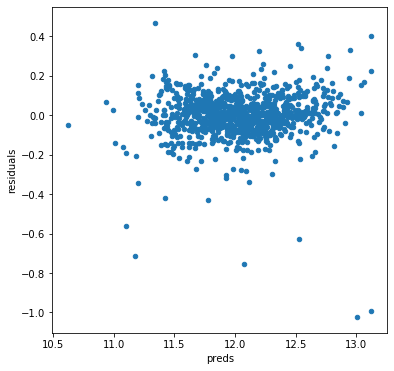

In [55]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

## Based on both the Ridge and Lasso Models, the key predictor variables for predicting the sales price of houses in Australia are as following:
1.  RoofMatl_ClyTile
2.  SaleCondition_Abnorml
3.  CentralAir_N
4.  Neighborhood_Edwards
5.  LandContour_Bnk
6.  MSZoning_RM
7.  BsmtCond_Fa
8.  MSSubClass
9.  BsmtExposure_No
10. Fence_GdWo
11. GarageCars
12. OverallQual
13. Neighborhood_NoRidge
14. BsmtQual_Ex
15. LotArea
16. Functional_Typ
17. Neighborhood_Crawfor
18. Exterior1st_BrkFace
19. Neighborhood_StoneBr
20. GrLivArea

## Lasso method is the fianal model for this dataset since it reduces the number of features.
1. Alpha value for Ridge regression Model is 10.
2. Alpha value for Lasso regression model is 0.001